In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('WineQT.csv')

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [9]:
df=pd.read_csv('WineQT.csv' ,usecols=[1,10,11])
#df.columns=['volatile acidity','alcohol','quality']

In [29]:
df.head()

,volatile acidity,alcohol,quality
0,0.70,9.4,5
1,0.88,9.8,5
2,0.76,9.8,5
3,0.28,9.8,6
4,0.70,9.4,5


C:\Users\paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='alcohol', ylabel='Density'>

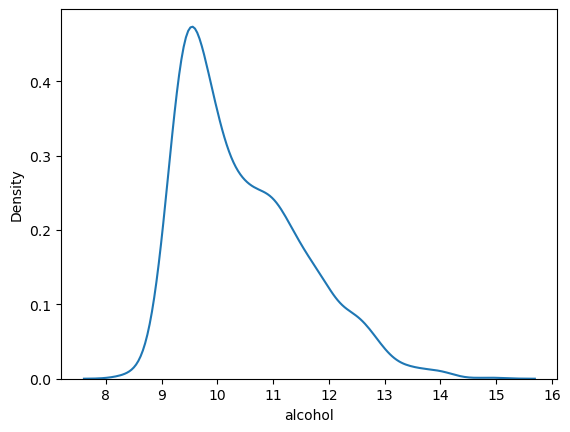

In [11]:
sns.kdeplot(df['alcohol'])

C:\Users\paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='volatile acidity', ylabel='Density'>

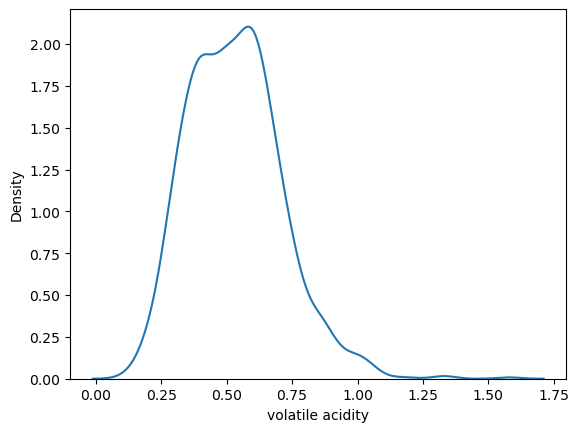

In [12]:
sns.kdeplot(df['volatile acidity'])

In [28]:
df.isnull().sum()

volatile acidity    0
alcohol             0
quality             0
dtype: int64

<Axes: xlabel='alcohol', ylabel='volatile acidity'>

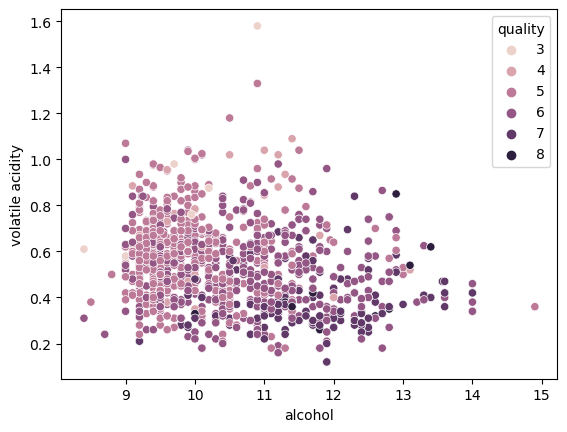

In [34]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(data=df,x='alcohol',y='volatile acidity',hue='quality' #palette=color_dict  )

# Normalization

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((800, 2), (343, 2))

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#fit the scaler to the train set, it will learn the parameter
scaler.fit(x_train)

#transform train and test sets
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [36]:
x_train_scaled =pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [37]:
np.round(x_train.describe(),1)

,volatile acidity,alcohol
count,800.0,800.0
mean,0.5,10.5
std,0.2,1.1
min,0.1,8.4
25%,0.4,9.5
50%,0.5,10.2
75%,0.6,11.2
max,1.3,14.9


In [38]:
np.round(x_train_scaled.describe(),1)

,volatile acidity,alcohol
count,800.0,800.0
mean,0.3,0.3
std,0.1,0.2
min,0.0,0.0
25%,0.2,0.2
50%,0.3,0.3
75%,0.4,0.4
max,1.0,1.0


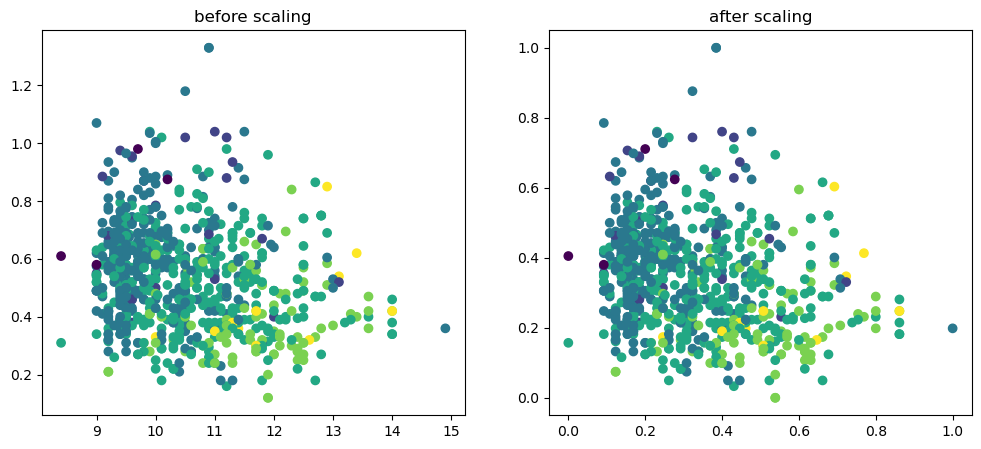

In [39]:
fig, (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['alcohol'],x_train['volatile acidity'],c=y_train)
ax1.set_title("before scaling")
ax2.scatter(x_train_scaled['alcohol'],x_train_scaled['volatile acidity'],c=y_train)
ax2.set_title("after scaling")
plt.show()

C:\Users\paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

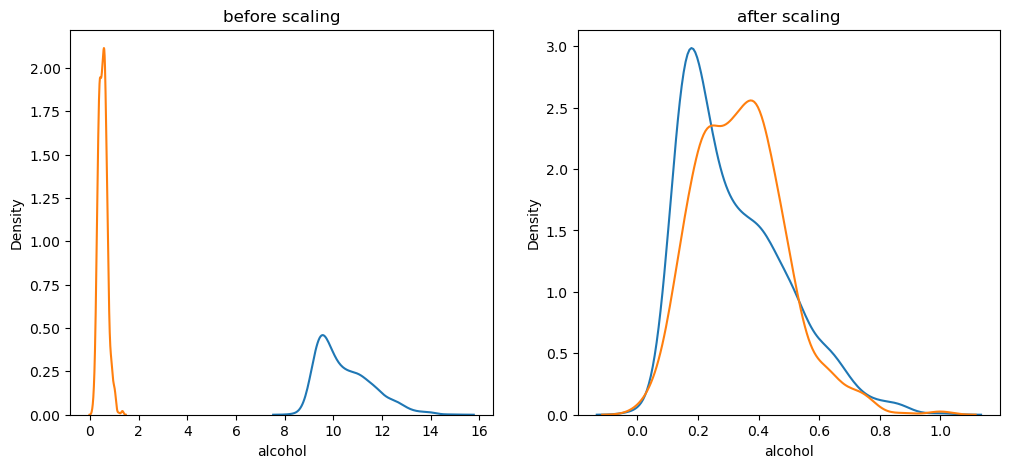

In [40]:
fig, (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,5))
#before scaling
ax1.set_title('before scaling')
sns.kdeplot(x_train['alcohol'],ax=ax1)
sns.kdeplot(x_train['volatile acidity'],ax=ax1)

#after scaling
ax2.set_title('after scaling')
sns.kdeplot(x_train_scaled['alcohol'],ax=ax2)
sns.kdeplot(x_train_scaled['volatile acidity'],ax=ax2)
plt.show()


C:\Users\paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


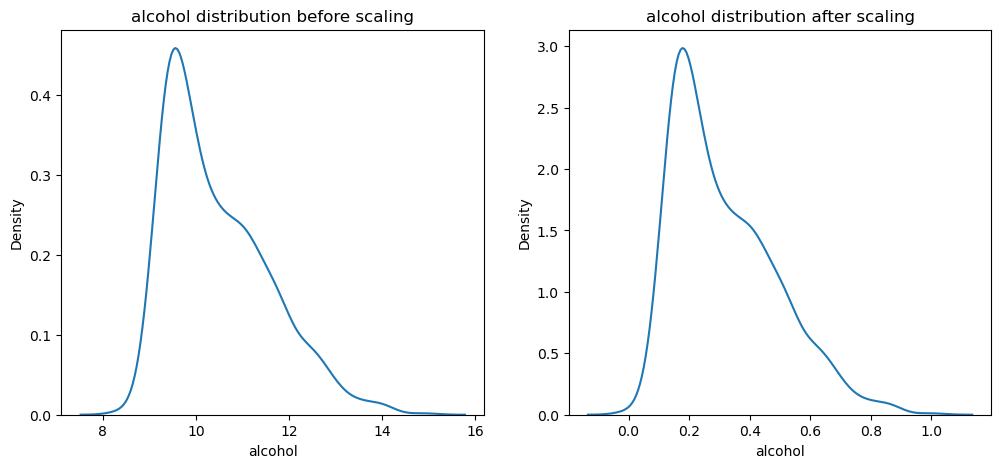

In [41]:
fig, (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('alcohol distribution before scaling')
sns.kdeplot(x_train['alcohol'],ax=ax1)

#after scaling
ax2.set_title('alcohol distribution after scaling')
sns.kdeplot(x_train_scaled['alcohol'],ax=ax2)
plt.show()


C:\Users\paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\paula\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


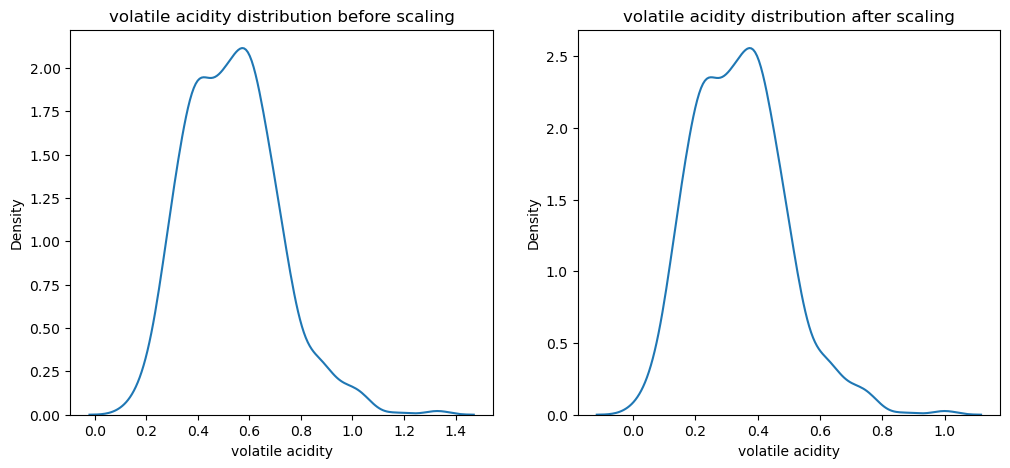

In [42]:
fig, (ax1,ax2) =plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('volatile acidity distribution before scaling')
sns.kdeplot(x_train['volatile acidity'],ax=ax1)

#after scaling
ax2.set_title('volatile acidity distribution after scaling')
sns.kdeplot(x_train_scaled['volatile acidity'],ax=ax2)
plt.show()